# This file is used to analyze pilot data collected in November of 2022

## The pilot is for 16 people, 4 groups of 4 subjects; 
## all HOMO or all HETERO




Text(0.5, 1.0, 'ABC123 vs $\\mathrm{ABC123}^{123}$')

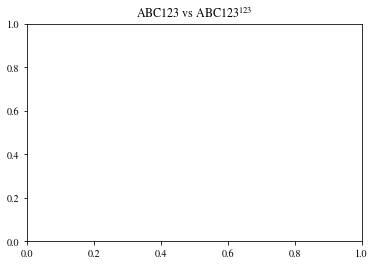

In [1]:
import pandas as pd
import numpy as np
import sys
import copy

import matplotlib.pyplot as plt
%matplotlib inline
# To change the default font like latex font
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')


In [2]:
def countCommas(s):
    try:
        return s.count(',')
    except:
        return np.nan

In [3]:
data = pd.DataFrame()
s = { 
#     'all_apps_wide_2022-11-04.csv': 'HETERO',
        'all_apps_wide_2022-11-07.csv': 'HETERO' ,
      'all_apps_wide_2022-11-07b.csv': 'HOMO' }
for ss in s.keys() :
    
    temp = pd.read_csv('..\\RawData\\'+ss)
    temp['Treatment'] = s[ss]
    data = data.append(temp,  ignore_index = True)

# Define functions and important variables 

In [4]:
variables = [ 'subsession.round_number','subsession.period', 'subsession.sg', 
#              'session.code','participant.code',
             'player.id_in_group','player.endowment', 'player.join_club', 
             'player.local_community', 'player.id_in_local', 
             'player.contribution_local', 'player.contribution_global',
             'player.total_contribution_local', 'player.individual_share_local', 'player.payoff',
           'group.id_in_subsession', 'group.FC', 'group.total_contribution_global','group.individual_share_global',
            ]


In [5]:
col_noOpp = 'PGSO_05_NoClubOpp_Part2'
# col_names = [col_noOpp+'.'+str(1)+'.'+ x for x in variables]
# col_rename = {}
# for x in variables:
#     col_rename[col_noOpp+'.'+str(1)+'.'+ x ] =  x
col_name_a =   ['session.code', 'Treatment']

# temp = data[col_names+col_name_a]
# temp = temp.rename(columns=col_rename) 
# data_noOppor = temp
data_noOppor = pd.DataFrame()
# data_noOppor = []
for i in range(1,11):
    col_names = [col_noOpp+'.'+str(i)+'.'+ x for x in variables]
    col_rename = {}
    for x in variables:
        col_rename[col_noOpp+'.'+str(i)+'.'+ x ] =  x
    temp = data[col_names + col_name_a]
    temp = temp.rename(columns=col_rename) 
    data_noOppor = data_noOppor.append(temp, ignore_index=True)
    
data_noOppor['privateAcc'] = data_noOppor['player.endowment']-data_noOppor['player.contribution_local']



In [6]:
def DataCutOut(AppName):
    col_noOpp = AppName
    col_name_a =   ['session.code', 'Treatment']
    data_noOppor = pd.DataFrame()
    for i in range(1,21):
        col_names = [col_noOpp+'.'+str(i)+'.'+ x for x in variables]
        col_rename = {}
        for x in variables:
            col_rename[col_noOpp+'.'+str(i)+'.'+ x ] =  x
        temp = data[col_names + col_name_a]
        temp = temp.rename(columns=col_rename) 
        data_noOppor = data_noOppor.append(temp, ignore_index=True)
    data_noOppor['endowment'] = data_noOppor['player.endowment']/10
    data_noOppor['privateAcc'] = data_noOppor['player.endowment']/10 -data_noOppor['player.contribution_local']-data_noOppor['player.contribution_global']
    return data_noOppor

In [7]:
# Cut out longer data

def DataCutOutLong(AppName, endRound):
    col_noOpp = AppName
    col_name_a =   ['session.code', 'Treatment']
    data_noOppor = pd.DataFrame()
    for i in range(1,endRound+1):
        col_names = [col_noOpp+'.'+str(i)+'.'+ x for x in variables]
        col_rename = {}
        for x in variables:
            col_rename[col_noOpp+'.'+str(i)+'.'+ x ] =  x
        temp = data[col_names + col_name_a]
        temp = temp.rename(columns=col_rename) 
        data_noOppor = data_noOppor.append(temp, ignore_index=True)
    data_noOppor['endowment'] = data_noOppor['player.endowment']/10
    data_noOppor['privateAcc'] = data_noOppor['player.endowment']/10-data_noOppor['player.contribution_local']-data_noOppor['player.contribution_global']
    data_noOppor['player.payoff'] = data_noOppor['player.payoff']/10
    return data_noOppor

In [8]:
def bootstrap_ci(data, n_samples, stat):
    
    n = len(data)                                #get length of the data
    ix = np.random.randint(0, n, (n_samples, n)) #get an array of bootsrapped indices
    samples = data[ix]                           #create bootrapped samples
    
    distribution = stat(samples, axis=1)

    return (np.percentile(distribution,2.5),np.percentile(distribution,97.5))

# Start Data Analysis

In [9]:
data_noOppor = DataCutOutLong('PGSO_05_NoClubOpp_Part2',20)
# var_of_interest = 'player.contribution_local'
var_of_interest = 'privateAcc'

LocalOnly = pd.pivot_table(data_noOppor, values=var_of_interest, index=['player.local_community',  'session.code', 'Treatment'],
                    columns=['subsession.round_number'], aggfunc=np.sum, fill_value=0)

LocalOnly

LocalOnly.groupby(['Treatment']).mean()

subsession.round_number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Treatment,,,,,,,,,,,,,,,,,,,,
HETERO,42.00,43.5,39.00,36.25,41.5,35.50,41.25,40.25,42.5,46.25,36.25,32.50,40.75,54.75,46.25,43.50,42.25,44.25,48.75,56.25
HOMO,43.25,48.5,47.25,48.75,57.5,51.25,51.75,49.00,52.5,54.75,50.50,52.25,52.25,46.75,45.25,51.25,51.00,55.50,59.25,58.50


In [10]:
# Note: when analyzing the global club good, can't use local community as the unit, use the whole group
data_Oppor = DataCutOutLong('PGSO_08_WithClubOppVariedCost_Part3',10)
data_OpporLong = DataCutOutLong('PGSO_08_WithClubOppVariedCost_Part3', 40)

# var_of_interest = 'player.contribution_local'
var_of_interest = 'privateAcc'

LocalGlobal = pd.pivot_table(data_Oppor, values=var_of_interest, index=['player.local_community',  'session.code', 'Treatment'],
                    columns=['subsession.round_number'], aggfunc=np.sum, fill_value=0)
LocalGlobal

LocalGlobal2 = pd.pivot_table(data_Oppor, values=var_of_interest, index=['group.id_in_subsession',  'session.code', 'Treatment'],
                    columns=['subsession.round_number'], aggfunc=np.sum, fill_value=0)

LocalGlobal.groupby(['Treatment']).mean()

subsession.round_number,1,2,3,4,5,6,7,8,9,10
Treatment,,,,,,,,,,
HETERO,28.25,29.50,30.25,35.0,38.75,40.25,38.0,51.00,47.5,51.75
HOMO,25.75,27.75,25.25,37.0,29.00,36.00,38.5,37.75,38.5,46.00


In [11]:
data_noOppor.columns

Index(['subsession.round_number', 'subsession.period', 'subsession.sg',
       'player.id_in_group', 'player.endowment', 'player.join_club',
       'player.local_community', 'player.id_in_local',
       'player.contribution_local', 'player.contribution_global',
       'player.total_contribution_local', 'player.individual_share_local',
       'player.payoff', 'group.id_in_subsession', 'group.FC',
       'group.total_contribution_global', 'group.individual_share_global',
       'session.code', 'Treatment', 'endowment', 'privateAcc'],
      dtype='object')

In [12]:
# Group Level data
Group_NoOpp = data_noOppor.groupby(['player.local_community', 
                                    'session.code', 'Treatment',
                                    'subsession.round_number',
                                    'subsession.period'])['player.contribution_local',
                                                          'endowment',
                                                          'privateAcc',
                                                         'player.payoff',
                                                          'player.join_club',
                                                        ].sum().reset_index()
# Group_Opp = data_OpporLong.groupby(['player.local_community', 
#                                     'session.code', 'Treatment', 'group.FC',
#                                     'subsession.round_number',
#                                     'subsession.period'])['player.contribution_local',
#                                                           'player.contribution_global',
#                                                           'endowment',
#                                                           'privateAcc'].sum().reset_index()

Group_Opp = data_Oppor.groupby(['player.local_community', 
                                    'session.code', 'Treatment', 'group.FC',
                                    'subsession.round_number',
                                    'subsession.period'])['player.contribution_local',
                                                          'player.contribution_global',
                                                          'endowment',
                                                          'privateAcc',
                                                         'player.payoff',
                                                         'player.join_club'].sum().reset_index()
# data_Oppor.
# Group_NoOpp


C:\Users\xinxi\AppData\Local\Temp/ipykernel_22544/309550317.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Group_NoOpp = data_noOppor.groupby(['player.local_community',
C:\Users\xinxi\AppData\Local\Temp/ipykernel_22544/309550317.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Group_Opp = data_Oppor.groupby(['player.local_community',


In [13]:
Group_Opp.groupby(['Treatment','group.FC'])['player.contribution_local','player.contribution_global'].agg(['count']).reset_index()

C:\Users\xinxi\AppData\Local\Temp/ipykernel_22544/3550823279.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Group_Opp.groupby(['Treatment','group.FC'])['player.contribution_local','player.contribution_global'].agg(['count']).reset_index()


,Treatment,group.FC,player.contribution_local,player.contribution_global
,,,count,count
0,HETERO,20,20,20
1,HETERO,80,20,20
2,HOMO,20,20,20
3,HOMO,80,20,20


In [14]:
# Draw a graph to show the total contribution without vs with opportunity 

Contribution_Combined = Group_Opp.groupby(['Treatment','group.FC'])['player.contribution_local',
                                                                    'player.contribution_global',
                                                                   'player.payoff', 'player.join_club'].mean().reset_index()
# Contribution_Combined =pd.pivot_table(Group_Opp, values=['player.contribution_local','player.contribution_global'], 
#               index=['Treatment'],columns=['group.FC'] ).reset_index()
temp = Group_NoOpp.groupby(['Treatment'])['player.contribution_local','player.payoff', 'player.join_club'].mean().reset_index()
Contribution_Combined = Contribution_Combined.merge(temp, on=['Treatment'])

Contribution_Combined_std = Group_Opp.groupby(['Treatment','group.FC'])['player.contribution_local',
                                                                    'player.contribution_global'].std().reset_index()
temp = Group_NoOpp.groupby(['Treatment'])['player.contribution_local'].std().reset_index()
Contribution_Combined_std = Contribution_Combined_std.merge(temp, on=['Treatment'])

# Try s.e.
Contribution_Combined_std['player.contribution_local_x']=Contribution_Combined_std['player.contribution_local_x']/np.sqrt(20)
Contribution_Combined_std['player.contribution_local_y']=Contribution_Combined_std['player.contribution_local_y']/np.sqrt(20)
Contribution_Combined_std['player.contribution_global']=Contribution_Combined_std['player.contribution_global']/np.sqrt(20)

C:\Users\xinxi\AppData\Local\Temp/ipykernel_22544/1269430694.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Contribution_Combined = Group_Opp.groupby(['Treatment','group.FC'])['player.contribution_local',
C:\Users\xinxi\AppData\Local\Temp/ipykernel_22544/1269430694.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = Group_NoOpp.groupby(['Treatment'])['player.contribution_local','player.payoff', 'player.join_club'].mean().reset_index()
C:\Users\xinxi\AppData\Local\Temp/ipykernel_22544/1269430694.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Contribution_Combined_std = Group_Opp.groupby(['Treatment','group.FC'])['player.contribution_local',


In [15]:

Contribution_Combined_CI9 = copy.deepcopy(Contribution_Combined)
Contribution_Combined_CI9
Contribution_Combined

,Treatment,group.FC,player.contribution_local_x,player.contribution_global,player.payoff_x,player.join_club_x,player.contribution_local_y,player.payoff_y,player.join_club_y
0,HETERO,20,6.90,24.90,175.06,3.95,37.325,132.255,0.0
1,HETERO,80,23.50,5.55,114.88,1.65,37.325,132.255,0.0
2,HOMO,20,4.75,30.55,192.89,3.95,28.650,120.110,0.0
3,HOMO,80,10.25,11.45,102.75,3.35,28.650,120.110,0.0


In [16]:
Contribution_Combined

,Treatment,group.FC,player.contribution_local_x,player.contribution_global,player.payoff_x,player.join_club_x,player.contribution_local_y,player.payoff_y,player.join_club_y
0,HETERO,20,6.90,24.90,175.06,3.95,37.325,132.255,0.0
1,HETERO,80,23.50,5.55,114.88,1.65,37.325,132.255,0.0
2,HOMO,20,4.75,30.55,192.89,3.95,28.650,120.110,0.0
3,HOMO,80,10.25,11.45,102.75,3.35,28.650,120.110,0.0


In [17]:
Contribution_Combined_CI9

,Treatment,group.FC,player.contribution_local_x,player.contribution_global,player.payoff_x,player.join_club_x,player.contribution_local_y,player.payoff_y,player.join_club_y
0,HETERO,20,6.90,24.90,175.06,3.95,37.325,132.255,0.0
1,HETERO,80,23.50,5.55,114.88,1.65,37.325,132.255,0.0
2,HOMO,20,4.75,30.55,192.89,3.95,28.650,120.110,0.0
3,HOMO,80,10.25,11.45,102.75,3.35,28.650,120.110,0.0


In [18]:
t = 'HETERO'
data = Group_NoOpp[(Group_NoOpp['Treatment']==t)]
# x =
bootstrap_ci(np.array(data['player.payoff']), 10000, np.mean)

(126.75956249999999, 138.1529375)

In [19]:
Contribution_Combined_CI9 = copy.deepcopy(Contribution_Combined)

for t in Contribution_Combined.Treatment.unique():
    data = Group_NoOpp[(Group_NoOpp['Treatment']==t)]
    x = bootstrap_ci(np.array(data['player.contribution_local']), 10000, np.mean)[0] 

    Contribution_Combined_CI9.loc[(Contribution_Combined_CI9['Treatment']==t), 
                                  'player.contribution_local_y'] -= x

    Contribution_Combined_CI9.loc[(Contribution_Combined_CI9['Treatment']==t), 
                                  'player.payoff_y'] -= bootstrap_ci(np.array(data['player.payoff']), 10000, np.mean)[0] 
   
    
    for fc in Contribution_Combined['group.FC'].unique():
        
     
        
        data = Group_Opp[(Group_Opp['Treatment']==t) & (Group_Opp['group.FC']==fc)]
        Contribution_Combined_CI9.loc[(Contribution_Combined_CI9['Treatment']==t) &
                                      (Contribution_Combined_CI9['group.FC']==fc),
                                      'player.contribution_local_x'] -= bootstrap_ci(np.array(data['player.contribution_local']), 10000, np.mean)[0]
        Contribution_Combined_CI9.loc[(Contribution_Combined_CI9['Treatment']==t) 
                                      & (Contribution_Combined_CI9['group.FC']==fc), 
                                      'player.contribution_global'] -= bootstrap_ci(np.array(data['player.contribution_global']), 10000, np.mean)[0]
        Contribution_Combined_CI9.loc[(Contribution_Combined_CI9['Treatment']==t) &
                                      (Contribution_Combined_CI9['group.FC']==fc), 
                                  'player.payoff_x'] -= bootstrap_ci(np.array(data['player.payoff']), 10000, np.mean)[0] 
        Contribution_Combined_CI9.loc[(Contribution_Combined_CI9['Treatment']==t) &
                                      (Contribution_Combined_CI9['group.FC']==fc), 
                                   'player.join_club_x'] -= bootstrap_ci(np.array(data['player.join_club']), 10000, np.mean)[0] 
    
    

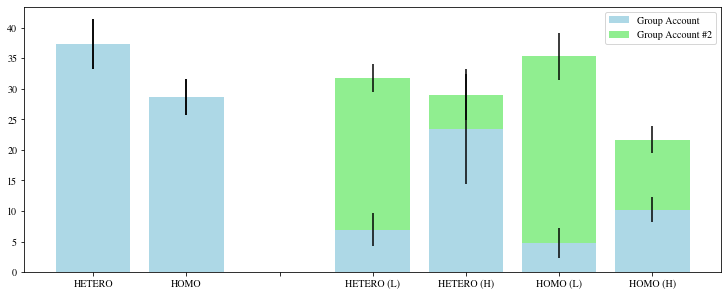

In [20]:
labels=  ['HETERO', 'HOMO', '','HETERO (L)',  'HETERO (H)','HOMO (L)', 'HOMO (H)']
x = np.arange(len(labels))
fig, axes = plt.subplots(nrows=1, ncols=1,  sharex=True,  sharey=True, constrained_layout=True, figsize=(10, 4))

axes.bar(Contribution_Combined.Treatment, Contribution_Combined['player.contribution_local_y'], 
         label="Group Account", 
         yerr=Contribution_Combined_CI9['player.contribution_local_y'], 
#          yerr=Contribution_Combined_std['player.contribution_local_y'],
         color='lightblue')

axes.bar(Contribution_Combined.index+3, Contribution_Combined['player.contribution_local_x'],
#          label="Group Account",
         yerr=Contribution_Combined_CI9['player.contribution_local_x'],
#          yerr=Contribution_Combined_std['player.contribution_local_x'],
         color='lightblue')
# Stacked bars
axes.bar(Contribution_Combined.index+3,
         Contribution_Combined['player.contribution_global'], label="Group Account #2", 
         bottom=Contribution_Combined['player.contribution_local_x'],
#         yerr=Contribution_Combined_std['player.contribution_global'],
         yerr=Contribution_Combined_CI9['player.contribution_global'],
         color='lightgreen')

axes.set_xticks(labels)
axes.legend()
# fig.annotate('Bars indicate standard error of each sample, taking each group in each round as one unit of observation (n=40)', (0.5, 1) )

In [21]:
Contribution_Combined

,Treatment,group.FC,player.contribution_local_x,player.contribution_global,player.payoff_x,player.join_club_x,player.contribution_local_y,player.payoff_y,player.join_club_y
0,HETERO,20,6.90,24.90,175.06,3.95,37.325,132.255,0.0
1,HETERO,80,23.50,5.55,114.88,1.65,37.325,132.255,0.0
2,HOMO,20,4.75,30.55,192.89,3.95,28.650,120.110,0.0
3,HOMO,80,10.25,11.45,102.75,3.35,28.650,120.110,0.0


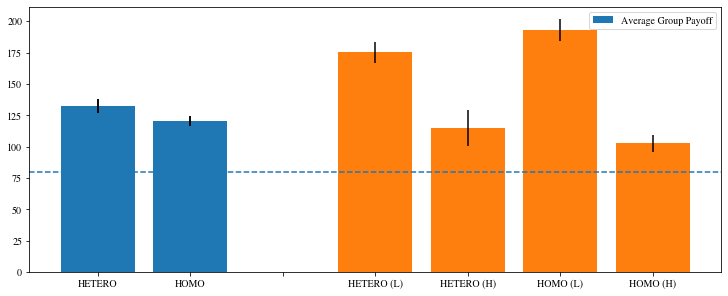

In [22]:
# Draw a graph to show the average player payoff without vs with opportunity 


labels=  ['HETERO', 'HOMO', '','HETERO (L)',  'HETERO (H)','HOMO (L)', 'HOMO (H)']
x = np.arange(len(labels))
fig, axes = plt.subplots(nrows=1, ncols=1,  sharex=True,  sharey=True, constrained_layout=True, figsize=(10, 4))

axes.bar(Contribution_Combined.Treatment, Contribution_Combined['player.payoff_y'], 
         label="Average Group Payoff", 
         yerr=Contribution_Combined_CI9['player.payoff_y'], 
#          yerr=Contribution_Combined_std['player.contribution_local_y'],
#          color='lightblue'
        )

axes.bar(Contribution_Combined.index+3, Contribution_Combined['player.payoff_x'],
#          label="Group Account",
         yerr=Contribution_Combined_CI9['player.payoff_x'],
#          yerr=Contribution_Combined_std['player.contribution_local_x'],
#          color='lightblue'
        )

axes.axhline(y=80, linestyle='dashed')

axes.set_xticks(labels)
axes.legend()
# fig.annotate('Bars indicate standard error of each sample, taking each group in each round as one unit of observation (n=40)', (0.5, 1) )

In [23]:
Contribution_Combined

,Treatment,group.FC,player.contribution_local_x,player.contribution_global,player.payoff_x,player.join_club_x,player.contribution_local_y,player.payoff_y,player.join_club_y
0,HETERO,20,6.90,24.90,175.06,3.95,37.325,132.255,0.0
1,HETERO,80,23.50,5.55,114.88,1.65,37.325,132.255,0.0
2,HOMO,20,4.75,30.55,192.89,3.95,28.650,120.110,0.0
3,HOMO,80,10.25,11.45,102.75,3.35,28.650,120.110,0.0


No handles with labels found to put in legend.


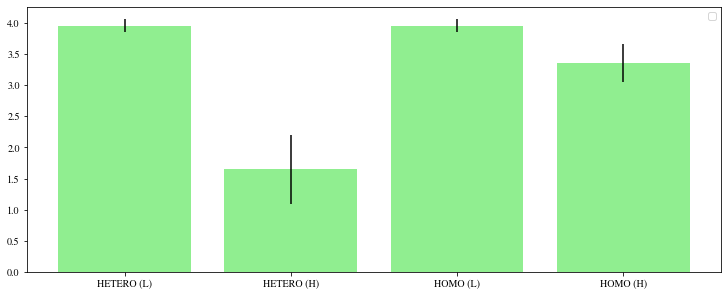

In [24]:
# Draw a graph to show the number of players who join the club with opportunity 


labels=  ['HETERO (L)',  'HETERO (H)','HOMO (L)', 'HOMO (H)']
x = np.arange(len(labels))
fig, axes = plt.subplots(nrows=1, ncols=1,  sharex=True,  sharey=True, constrained_layout=True, figsize=(10, 4))

axes.bar(list(Contribution_Combined.index), Contribution_Combined['player.join_club_x'],
#          label="Group Account",
         yerr=Contribution_Combined_CI9['player.join_club_x'],
#          yerr=Contribution_Combined_std['player.contribution_local_x'],
         color='lightgreen')

axes.set_xticks(ticks=list(Contribution_Combined.index))
axes.set_xticklabels(labels)
axes.legend()
# fig.annotate('Bars indicate standard error of each sample, taking each group in each round as one unit of observation (n=40)', (0.5, 1) )

In [25]:
data_Oppor

,subsession.round_number,subsession.period,subsession.sg,player.id_in_group,player.endowment,player.join_club,player.local_community,player.id_in_local,player.contribution_local,player.contribution_global,...,player.individual_share_local,player.payoff,group.id_in_subsession,group.FC,group.total_contribution_global,group.individual_share_global,session.code,Treatment,endowment,privateAcc
0,1,1,1,1,220.0,1,1,0,2.0,4.0,...,24.0,43.0,1,80,410.0,246.0,0xie52jg,HETERO,22.0,16.0
1,1,1,1,5,220.0,1,2,0,11.0,11.0,...,66.0,31.2,1,80,410.0,246.0,0xie52jg,HETERO,22.0,0.0
2,1,1,1,1,280.0,1,3,0,5.0,5.0,...,54.0,54.0,2,20,510.0,306.0,0xie52jg,HETERO,28.0,18.0
3,1,1,1,5,280.0,1,0,0,0.0,14.0,...,66.0,51.2,2,20,510.0,306.0,0xie52jg,HETERO,28.0,14.0
4,1,1,1,2,220.0,1,1,1,1.0,1.0,...,24.0,47.0,1,80,410.0,246.0,0xie52jg,HETERO,22.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,10,10,1,7,180.0,1,0,2,0.0,2.0,...,0.0,43.0,2,20,450.0,270.0,dcouj6u9,HOMO,18.0,16.0
316,10,10,1,4,200.0,0,1,3,3.0,0.0,...,84.0,25.4,1,80,90.0,54.0,dcouj6u9,HOMO,20.0,17.0
317,10,10,1,8,120.0,1,2,3,0.0,0.0,...,24.0,19.8,1,80,90.0,54.0,dcouj6u9,HOMO,12.0,12.0
318,10,10,1,4,180.0,1,3,3,0.0,18.0,...,0.0,27.0,2,20,450.0,270.0,dcouj6u9,HOMO,18.0,0.0


## Group Level data, inequality

C:\Users\xinxi\AppData\Local\Temp/ipykernel_22544/632704725.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Group_NoOpp = data_noOppor.groupby(['player.local_community',
C:\Users\xinxi\AppData\Local\Temp/ipykernel_22544/632704725.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Group_Opp = data_Oppor.groupby(['player.local_community',
C:\Users\xinxi\AppData\Local\Temp/ipykernel_22544/632704725.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Contribution_Combined = Group_Opp.groupby(['Treatment','group.FC'])['endowment','player.payoff'].mean().reset_index()
C:\Users\xinxi\AppData\Local\Temp/ipykernel_22544/632704725.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a lis

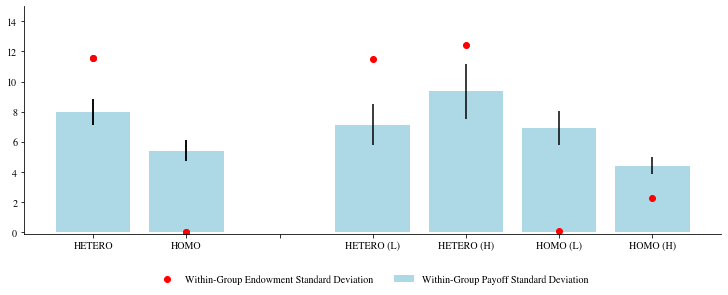

In [26]:
# Group Level data
Group_NoOpp = data_noOppor.groupby(['player.local_community', 
                                    'session.code', 'Treatment',
                                    'subsession.round_number',
                                    'subsession.period'])['endowment',
                                                         'player.payoff',
                                                        ].std().reset_index()


Group_Opp = data_Oppor.groupby(['player.local_community', 
                                    'session.code', 'Treatment', 'group.FC',
                                    'subsession.round_number',
                                    'subsession.period'])['endowment','player.payoff'].std().reset_index()


Contribution_Combined = Group_Opp.groupby(['Treatment','group.FC'])['endowment','player.payoff'].mean().reset_index()
# Contribution_Combined =pd.pivot_table(Group_Opp, values=['player.contribution_local','player.contribution_global'], 
#               index=['Treatment'],columns=['group.FC'] ).reset_index()
temp = Group_NoOpp.groupby(['Treatment'])['endowment','player.payoff'].mean().reset_index()
Contribution_Combined = Contribution_Combined.merge(temp, on=['Treatment'])

# Calculate confidence intervals
Contribution_Combined_CI9 = copy.deepcopy(Contribution_Combined)

for t in Contribution_Combined.Treatment.unique():
    data = Group_NoOpp[(Group_NoOpp['Treatment']==t)]

    Contribution_Combined_CI9.loc[(Contribution_Combined_CI9['Treatment']==t), 
                                  'endowment_y'] -= bootstrap_ci(np.array(data['endowment']), 10000, np.mean)[0] 

    Contribution_Combined_CI9.loc[(Contribution_Combined_CI9['Treatment']==t), 
                                  'player.payoff_y'] -= bootstrap_ci(np.array(data['player.payoff']), 10000, np.mean)[0] 
    
    
    for fc in Contribution_Combined['group.FC'].unique():
        
     
        
        data = Group_Opp[(Group_Opp['Treatment']==t) & (Group_Opp['group.FC']==fc)]
        Contribution_Combined_CI9.loc[(Contribution_Combined_CI9['Treatment']==t) &
                                      (Contribution_Combined_CI9['group.FC']==fc),
                                      'endowment_x'] -= bootstrap_ci(np.array(data['endowment']), 10000, np.mean)[0]
        Contribution_Combined_CI9.loc[(Contribution_Combined_CI9['Treatment']==t) &
                                      (Contribution_Combined_CI9['group.FC']==fc), 
                                  'player.payoff_x'] -= bootstrap_ci(np.array(data['player.payoff']), 10000, np.mean)[0] 
    
    


# Draw a graph to show the average player payoff without vs with opportunity 


labels=  ['HETERO', 'HOMO', '','HETERO (L)',  'HETERO (H)','HOMO (L)', 'HOMO (H)']
x = np.arange(len(labels))
fig, axes = plt.subplots(nrows=1, ncols=1,  sharex=True,  sharey=True, constrained_layout=True, figsize=(10, 4))

axes.scatter(Contribution_Combined.Treatment, Contribution_Combined['endowment_y'], 
         label="Within-Group Endowment Standard Deviation", 
         color='red',zorder=1)
axes.bar(Contribution_Combined.Treatment, Contribution_Combined['player.payoff_y'], 
         label="Within-Group Payoff Standard Deviation", 
         yerr=Contribution_Combined_CI9['player.payoff_y'], 
         color='lightblue',zorder=-1)


axes.scatter(Contribution_Combined.index+3, Contribution_Combined['endowment_x'], 
         color='red',zorder=1)
axes.bar(Contribution_Combined.index+3, Contribution_Combined['player.payoff_x'],
#          label="Group Account",
         yerr=Contribution_Combined_CI9['player.payoff_x'],
         color='lightblue',zorder=-1)

# axes.axhline(y=80, linestyle='dashed')
axes.set_ylim(-0.1,15)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_xticks(labels)
axes.legend(bbox_to_anchor=(.5,-0.2), loc="center" , ncol=2, frameon=False)
# fig.annotate('Bars indicate standard error of each sample, taking each group in each round as one unit of observation (n=40)', (0.5, 1) )

In [27]:
Contribution_Combined

,Treatment,group.FC,endowment_x,player.payoff_x,endowment_y,player.payoff_y
0,HETERO,20,11.519655,7.127646,11.547005,7.958496
1,HETERO,80,12.402235,9.347404,11.547005,7.958496
2,HOMO,20,0.050000,6.883066,0.000000,5.413268
3,HOMO,80,2.261880,4.418199,0.000000,5.413268


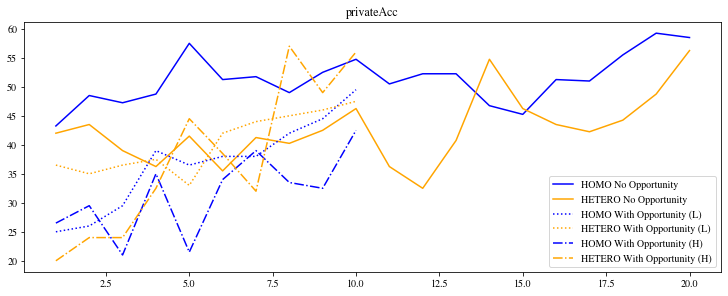

In [28]:
# Private Account 
var_of_interest = 'privateAcc'

LocalOnly = pd.pivot_table(data_noOppor, values=var_of_interest, 
                           index=['player.local_community',  'session.code', 'Treatment'],
                    columns=['subsession.round_number'], aggfunc=np.sum, fill_value=0).groupby(['Treatment']).mean()
LocalWith = pd.pivot_table(data_Oppor, values=var_of_interest, 
                           index=['player.local_community',  'session.code', 'Treatment','group.FC'],
                    columns=['subsession.round_number'], aggfunc=np.sum, fill_value=0).groupby(['Treatment','group.FC']).mean()
# LocalOnly = group.groupby(['Treatment']).mean()

fig, axes = plt.subplots(nrows=1, ncols=1,  sharex=True,  sharey=True, constrained_layout=True, figsize=(10, 4))
# fig.plot()
axes.plot(LocalOnly.T['HOMO'], label='HOMO No Opportunity', c='blue')
axes.plot(LocalOnly.T['HETERO'], label='HETERO No Opportunity', c='orange')
axes.plot(LocalWith.T['HOMO'][20], label='HOMO With Opportunity (L)', c='blue', ls=':')
axes.plot(LocalWith.T['HETERO'][20], label='HETERO With Opportunity (L)', c='orange',ls=':')
axes.plot(LocalWith.T['HOMO'][80], label='HOMO With Opportunity (H)', c='blue', ls='-.')
axes.plot(LocalWith.T['HETERO'][80], label='HETERO With Opportunity (H)', c='orange',ls='-.')


axes.set_title(str(var_of_interest))
axes.legend()

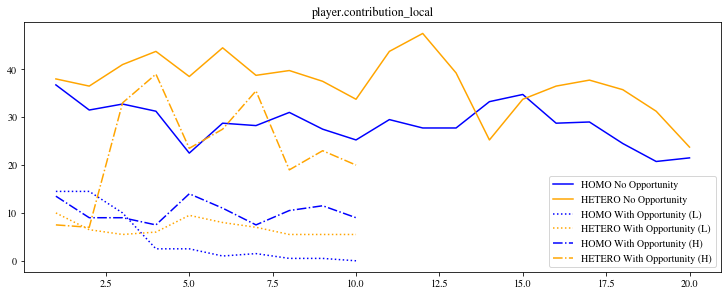

In [29]:
# Local Group Account 
var_of_interest = 'player.contribution_local'

LocalOnly = pd.pivot_table(data_noOppor, values=var_of_interest, 
                           index=['player.local_community',  'session.code', 'Treatment'],
                    columns=['subsession.round_number'], aggfunc=np.sum, fill_value=0).groupby(['Treatment']).mean()
LocalWith = pd.pivot_table(data_Oppor, values=var_of_interest, 
                           index=['player.local_community',  'session.code', 'Treatment', 'group.FC'],
                    columns=['subsession.round_number'], aggfunc=np.sum, fill_value=0).groupby(['Treatment', 'group.FC']).mean()
# LocalOnly = group.groupby(['Treatment']).mean()

fig, axes = plt.subplots(nrows=1, ncols=1,  sharex=True,  sharey=True, constrained_layout=True, figsize=(10, 4))
# fig.plot()
axes.plot(LocalOnly.T['HOMO'], label='HOMO No Opportunity', c='blue')
axes.plot(LocalOnly.T['HETERO'], label='HETERO No Opportunity', c='orange')
axes.plot(LocalWith.T['HOMO'][20], label='HOMO With Opportunity (L)', c='blue', ls=':')
axes.plot(LocalWith.T['HETERO'][20], label='HETERO With Opportunity (L)', c='orange',ls=':')
axes.plot(LocalWith.T['HOMO'][80], label='HOMO With Opportunity (H)', c='blue', ls='-.')
axes.plot(LocalWith.T['HETERO'][80], label='HETERO With Opportunity (H)', c='orange',ls='-.')

axes.set_title(str(var_of_interest))
axes.legend()

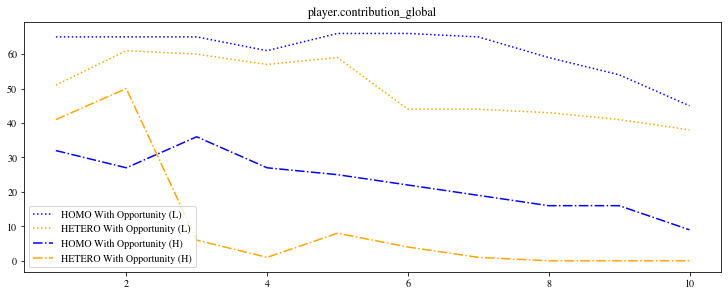

In [30]:
# Global Group Account 
var_of_interest = 'player.contribution_global'


LocalWith = pd.pivot_table(data_Oppor, values=var_of_interest, 
                           index=['group.id_in_subsession',  'session.code', 'Treatment','group.FC'],
                    columns=['subsession.round_number'], aggfunc=np.sum, fill_value=0).groupby(['Treatment','group.FC']).mean()
# LocalOnly = group.groupby(['Treatment']).mean()

fig, axes = plt.subplots(nrows=1, ncols=1,  sharex=True,  sharey=True, constrained_layout=True, figsize=(10, 4))
# fig.plot()
# axes.plot(LocalOnly.T['HOMO'], label='HOMO No Opportunity', c='blue')
# axes.plot(LocalOnly.T['HETERO'], label='HETERO No Opportunity', c='orange')
axes.plot(LocalWith.T['HOMO'][20], label='HOMO With Opportunity (L)', c='blue', ls=':')
axes.plot(LocalWith.T['HETERO'][20], label='HETERO With Opportunity (L)', c='orange',ls=':')
axes.plot(LocalWith.T['HOMO'][80], label='HOMO With Opportunity (H)', c='blue', ls='-.')
axes.plot(LocalWith.T['HETERO'][80], label='HETERO With Opportunity (H)', c='orange',ls='-.')

axes.set_title(str(var_of_interest))
axes.legend()

In [32]:
data_noOppor

,subsession.round_number,subsession.period,subsession.sg,player.id_in_group,player.endowment,player.join_club,player.local_community,player.id_in_local,player.contribution_local,player.contribution_global,...,player.individual_share_local,player.payoff,group.id_in_subsession,group.FC,group.total_contribution_global,group.individual_share_global,session.code,Treatment,endowment,privateAcc
0,1,1,1,1,300.0,0,1,0,5.0,0.0,...,108.0,35.8,1,80,0.0,0.0,0xie52jg,HETERO,30.0,25.0
1,1,1,1,5,300.0,0,2,0,20.0,0.0,...,360.0,46.0,1,80,0.0,0.0,0xie52jg,HETERO,30.0,10.0
2,1,1,1,1,300.0,0,3,0,25.0,0.0,...,210.0,26.0,2,20,0.0,0.0,0xie52jg,HETERO,30.0,5.0
3,1,1,1,5,300.0,0,0,0,15.0,0.0,...,234.0,38.4,2,20,0.0,0.0,0xie52jg,HETERO,30.0,15.0
4,1,1,1,2,300.0,0,1,1,10.0,0.0,...,108.0,30.8,1,80,0.0,0.0,0xie52jg,HETERO,30.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,20,20,1,7,200.0,0,0,2,0.0,0.0,...,0.0,20.0,2,20,0.0,0.0,dcouj6u9,HOMO,20.0,20.0
636,20,20,1,4,200.0,0,1,3,3.0,0.0,...,138.0,30.8,1,80,0.0,0.0,dcouj6u9,HOMO,20.0,17.0
637,20,20,1,8,200.0,0,2,3,0.0,0.0,...,108.0,30.8,1,80,0.0,0.0,dcouj6u9,HOMO,20.0,20.0
638,20,20,1,4,200.0,0,3,3,20.0,0.0,...,270.0,27.0,2,20,0.0,0.0,dcouj6u9,HOMO,20.0,0.0


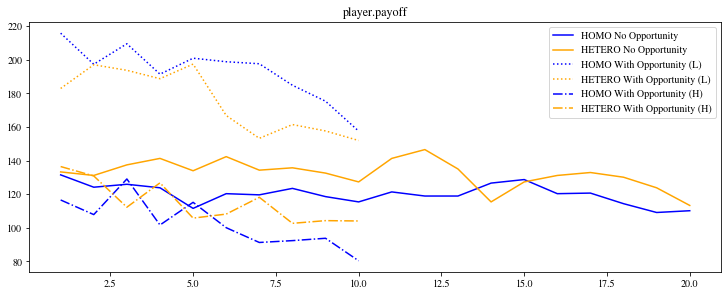

In [33]:
# Payoff 
var_of_interest = 'player.payoff'

LocalOnly = pd.pivot_table(data_noOppor, values=var_of_interest, 
                           index=['player.local_community',  'session.code', 'Treatment'],
                    columns=['subsession.round_number'], aggfunc=np.sum, fill_value=0).groupby(['Treatment']).mean()
LocalWith = pd.pivot_table(data_Oppor, values=var_of_interest, 
                           index=['player.local_community',  'session.code', 'Treatment','group.FC'],
                    columns=['subsession.round_number'],
#                            columns=['subsession.period'],
                           aggfunc=np.sum, fill_value=0).groupby(['Treatment','group.FC']).mean()
# LocalOnly = group.groupby(['Treatment']).mean()

fig, axes = plt.subplots(nrows=1, ncols=1,  sharex=True,  sharey=True, constrained_layout=True, figsize=(10, 4))
# fig.plot()
axes.plot(LocalOnly.T['HOMO'], label='HOMO No Opportunity', c='blue')
axes.plot(LocalOnly.T['HETERO'], label='HETERO No Opportunity', c='orange')
axes.plot(LocalWith.T['HOMO'][20], label='HOMO With Opportunity (L)', c='blue', ls=':')
axes.plot(LocalWith.T['HETERO'][20], label='HETERO With Opportunity (L)', c='orange',ls=':')
axes.plot(LocalWith.T['HOMO'][80], label='HOMO With Opportunity (H)', c='blue', ls='-.')
axes.plot(LocalWith.T['HETERO'][80], label='HETERO With Opportunity (H)', c='orange',ls='-.')


axes.set_title(str(var_of_interest))
axes.legend()

In [34]:
data_Oppor

,subsession.round_number,subsession.period,subsession.sg,player.id_in_group,player.endowment,player.join_club,player.local_community,player.id_in_local,player.contribution_local,player.contribution_global,...,player.individual_share_local,player.payoff,group.id_in_subsession,group.FC,group.total_contribution_global,group.individual_share_global,session.code,Treatment,endowment,privateAcc
0,1,1,1,1,220.0,1,1,0,2.0,4.0,...,24.0,43.0,1,80,410.0,246.0,0xie52jg,HETERO,22.0,16.0
1,1,1,1,5,220.0,1,2,0,11.0,11.0,...,66.0,31.2,1,80,410.0,246.0,0xie52jg,HETERO,22.0,0.0
2,1,1,1,1,280.0,1,3,0,5.0,5.0,...,54.0,54.0,2,20,510.0,306.0,0xie52jg,HETERO,28.0,18.0
3,1,1,1,5,280.0,1,0,0,0.0,14.0,...,66.0,51.2,2,20,510.0,306.0,0xie52jg,HETERO,28.0,14.0
4,1,1,1,2,220.0,1,1,1,1.0,1.0,...,24.0,47.0,1,80,410.0,246.0,0xie52jg,HETERO,22.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,10,10,1,7,180.0,1,0,2,0.0,2.0,...,0.0,43.0,2,20,450.0,270.0,dcouj6u9,HOMO,18.0,16.0
316,10,10,1,4,200.0,0,1,3,3.0,0.0,...,84.0,25.4,1,80,90.0,54.0,dcouj6u9,HOMO,20.0,17.0
317,10,10,1,8,120.0,1,2,3,0.0,0.0,...,24.0,19.8,1,80,90.0,54.0,dcouj6u9,HOMO,12.0,12.0
318,10,10,1,4,180.0,1,3,3,0.0,18.0,...,0.0,27.0,2,20,450.0,270.0,dcouj6u9,HOMO,18.0,0.0


In [35]:
LocalWith

subsession.round_number     1      2      3      4      5      6      7   \
Treatment group.FC                                                         
HETERO    20             182.9  197.0  193.7  188.7  197.4  166.8  153.2   
          80             136.4  130.8  112.2  126.7  105.7  108.1  118.1   
HOMO      20             215.8  197.3  209.5  191.4  200.9  198.8  197.6   
          80             116.5  107.8  129.0  101.6  115.1  100.0   91.2   

subsession.round_number     8      9      10  
Treatment group.FC                            
HETERO    20             161.4  157.6  151.9  
          80             102.6  104.2  104.0  
HOMO      20             184.8  175.3  157.5  
          80              92.3   93.7   80.3

In [49]:
# var_of_interest =  'player.join_club'
var_of_interest = 'player.contribution_global'
# var_of_interest = 'player.contribution_local' 
# var_of_interest = 'privateAcc'

LocalGlobal = pd.pivot_table(data_OpporLong, values=var_of_interest, 
                    index=['group.id_in_subsession',  'session.code', 'Treatment','subsession.sg', 'group.FC' ],
                    columns=['subsession.period'], aggfunc=np.sum, fill_value=0)


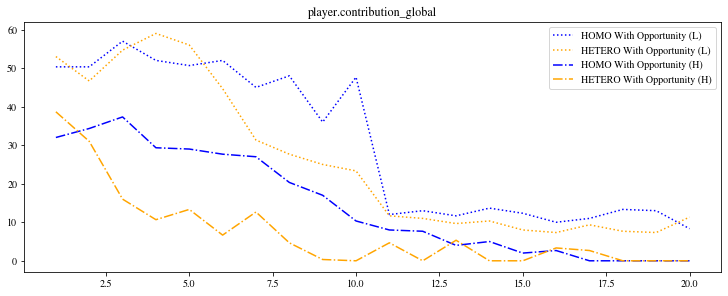

In [50]:
SuperGames = LocalGlobal.groupby(['Treatment','group.FC']).mean()
SuperGames
fig, axes = plt.subplots(nrows=1, ncols=1,  sharex=True,  sharey=True, constrained_layout=True, figsize=(10, 4))
# # fig.plot()
axes.plot(SuperGames.T['HOMO'][20], label='HOMO With Opportunity (L)', c='blue', ls=':')
axes.plot(SuperGames.T['HETERO'][20], label='HETERO With Opportunity (L)', c='orange',ls=':')
axes.plot(SuperGames.T['HOMO'][80], label='HOMO With Opportunity (H)', c='blue', ls='-.')
axes.plot(SuperGames.T['HETERO'][80], label='HETERO With Opportunity (H)', c='orange',ls='-.')
axes.set_title(str(var_of_interest))
axes.legend()

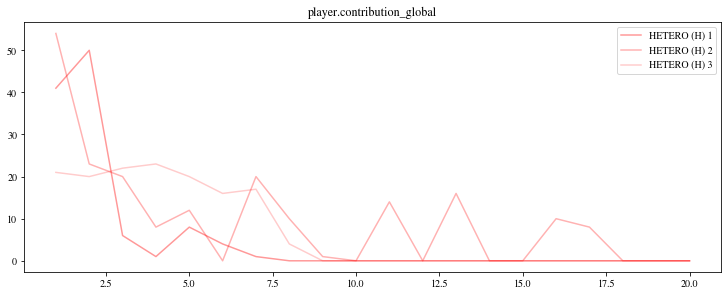

In [56]:
SuperGames = LocalGlobal.groupby(['Treatment','group.FC','subsession.sg']).mean()
SuperGames
fig, axes = plt.subplots(nrows=1, ncols=1,  sharex=True,  sharey=True, constrained_layout=True, figsize=(10, 4))
for i in range(1,4):
#     axes.plot(SuperGames.T['HOMO'][20][i], label='HOMO (L) '+str(i), alpha=0.05*(10-2*i))
#     axes.plot(SuperGames.T['HETERO'][20][i], label='HETERO (L) '+str(i), c='orange',alpha=0.05*(10-2*i))
#     axes.plot(SuperGames.T['HOMO'][80][i], label='HOMO (H) '+str(i), alpha=0.05*(10-2*i))
    axes.plot(SuperGames.T['HETERO'][80][i], label='HETERO (H) '+str(i), c='red', alpha=0.05*(10-2*i))
axes.set_title(str(var_of_interest))
axes.legend()

In [75]:
col_WOpp = 'PGSO_08_WithClubOppVariedCost_Part3'
col_names = [col_WOpp+'.'+str(1)+'.'+ x for x in variables]
col_rename = {}
for x in variables:
    col_rename[col_WOpp+'.'+str(1)+'.'+ x ] =  x
temp = data[col_names]
temp = temp.rename(columns=col_rename) 
data_WOppor = temp
# data_noOppor = []
for i in range(2,11):
    col_names = [col_WOpp+'.'+str(i)+'.'+ x for x in variables]
    col_rename = {}
    for x in variables:
        col_rename[col_WOpp+'.'+str(i)+'.'+ x ] =  x
    temp = data[col_names]
    temp = temp.rename(columns=col_rename) 
    data_WOppor = data_WOppor.append(temp, ignore_index=True)
    
LocalGlobal_l = pd.pivot_table(data_WOppor, values='player.contribution_local', index=['player.local_community'],
                    columns=['subsession.round_number'], aggfunc=np.sum, fill_value=0)
LocalGlobal_l

subsession.round_number,1,2,3,4,5,6,7,8,9,10
player.local_community,,,,,,,,,,
0,8,1,2,1,2,2,2,1,1,1
1,11,7,20,30,19,45,45,55,53,32
2,10,0,0,0,10,10,40,10,10,0
3,12,6,6,2,5,3,3,4,7,5


In [79]:
LocalGlobal_gF = pd.pivot_table(data_WOppor, values=[
                                            'player.join_club',
                                                     'player.contribution_local', 
                                                     'player.contribution_global'],
                                index=['subsession.round_number'],
                    columns=['player.local_community','group.id_in_subsession', 'group.FC' ], aggfunc=np.sum, fill_value=0)
LocalGlobal_gF

player.contribution_global              \
player.local_community                           0   1   2   3   
group.id_in_subsession                           2   1   1   2   
group.FC                                        20  80  80  20   
subsession.round_number                                          
1                                               14  13  24  15   
2                                               11  22  24  16   
3                                               28  20  24  11   
4                                               29  22   2  12   
5                                               16  15   0  16   
6                                                8   0   0  14   
7                                               16   0   0  11   
8                                               19   0   0  13   
9                                               14   0   0  13   
10                                              21   5   0  13   

                        player.contribution_local              \
player.local_community                          0   1   2   3   
group.id_in_subsession                          2   1   1   2   
group.FC                                       20  80  80  20   
subsession.round_number                                         
1                                               8  11  10  12   
2                                               1   7   0   6   
3                                               2  20   0   6   
4                                               1  30   0   2   
5                                               2  19  10   5   
6                                               2  45  10   3   
7                                               2  45  40   3   
8                                               1  55  10   4   
9                                               1  53  10   7   
10                                              1  32   0   5   

                        player.join_club           
player.local_community                 0  1  2  3  
group.id_in_subsession                 2  1  1  2  
group.FC                              20 80 80 20  
subsession.round_number                            
1                                      4  3  3  3  
2                                      2  3  3  3  
3                                      4  3  3  2  
4                                      4  2  2  4  
5                                      3  1  2  3  
6                                      3  0  0  4  
7                                      3  0  0  3  
8                                      3  0  0  3  
9                                      3  0  0  3  
10                                     3  1  0  3

In [82]:
LocalGlobal_gF2 = pd.pivot_table(data_WOppor, values=[
                                            'group.total_contribution_global'],
                                index=['subsession.round_number'],
                    columns=['player.local_community','group.id_in_subsession', 'group.FC' ], aggfunc=np.mean, fill_value=0)
LocalGlobal_gF2

group.total_contribution_global               
player.local_community                                0    1    2    3
group.id_in_subsession                                2    1    1    2
group.FC                                             20   80   80   20
subsession.round_number                                               
1                                                    30  370  370   30
2                                                    60   50   50   60
3                                                     0    0    0    0
4                                                   100   20   20  100
5                                                   320    0    0  320
6                                                     0    0    0    0
7                                                     0    0    0    0
8                                                     0    0    0    0
9                                                    50    0    0   50
10                                                  230    0    0  230

In [86]:
condition = (data_WOppor['subsession.round_number'] == 2 )  & (data_WOppor['group.id_in_subsession'] == 2 )
data_WOppor[condition]

,subsession.round_number,subsession.period,subsession.sg,subsession.period,player.id_in_group,player.endowment,player.join_club,player.local_community,player.id_in_local,player.contribution_local,player.contribution_global,player.total_contribution_local,player.individual_share_local,group.id_in_subsession,group.FC,group.total_contribution_global,group.individual_share_global
18,2,2,1,2,1,300.0,0,3,0,2.0,0.0,20.0,12.0,2,20,60.0,36.0
19,2,2,1,2,5,280.0,1,0,0,0.0,6.0,0.0,0.0,2,20,60.0,36.0
22,2,2,1,2,2,280.0,1,3,1,0.0,8.0,20.0,12.0,2,20,60.0,36.0
23,2,2,1,2,6,280.0,1,0,1,0.0,5.0,0.0,0.0,2,20,60.0,36.0
26,2,2,1,2,3,80.0,1,3,2,2.0,2.0,20.0,12.0,2,20,60.0,36.0
27,2,2,1,2,7,100.0,0,0,2,0.0,0.0,0.0,0.0,2,20,60.0,36.0
30,2,2,1,2,4,80.0,1,3,3,2.0,6.0,20.0,12.0,2,20,60.0,36.0
31,2,2,1,2,8,100.0,0,0,3,1.0,0.0,0.0,0.0,2,20,60.0,36.0


# Check page time



In [ ]:
# Some useful code in the past

In [3]:
sessions = {
            'all_apps_wide_2022-11-04.csv':['pilot_1',125,'DynamicPower_05_Experiment.','T6 END',4], 
        
    
    
           }

rows = {}

nRows = 0
for i,s in enumerate(sessions):
    print("------------")
    print(s)
    data=pd.read_csv('..\\RawData\\'+s)
    sessions[s].append(nRows)
    nRows += data.shape[0]
    sessions[s].append(nRows)
    if not sessions[s][3] in rows:
        rows[sessions[s][3]]=np.arange(sessions[s][5],sessions[s][6])
    else:
        rows[sessions[s][3]]=np.concatenate([rows[sessions[s][3]],np.arange(sessions[s][5],sessions[s][6])])

sessions

#session dictionary
#session file : [sequence, experiment label within file, start row, end row + 1]

------------
2022_02_11_pilot_session1.csv
------------
2022_02_18_pilot_session2.csv
------------
2022_02_23_pilot_session3.csv
------------
2022_02_28_pilot_session4.csv
------------
2022_02_28_pilot_session5.csv
------------
2022_03_02_pilot_session6.csv
------------
2022_03_08_pilot_session7.csv
------------
2022_03_08_pilot_session8.csv
------------
2022_03_09_pilot_session9.csv
------------
2022_03_09_pilot_session10.csv
------------
2022_03_22_pilot_session11.csv
------------
2022_03_22_pilot_session12.csv
------------
2022_03_23_pilot_session13.csv
------------
2022_03_23_pilot_session14.csv
------------
2022_04_05_real_session1a.csv
------------
2022_04_05_real_session1b.csv
------------
2022_04_05_real_session2a.csv
------------
2022_04_05_real_session2b.csv
------------
2022_04_05_real_session3.csv
------------
2022_04_07_real_session4b.csv
------------
2022_04_07_real_session4a.csv
------------
2022_04_08_real_session5.csv
------------
2022_04_08_real_session5_5(wrongT5X).c

{'2022_02_11_pilot_session1.csv': ['pilot_1',
  125,
  'DynamicPower_05_Experiment.',
  'T6 END',
  4,
  0,
  16],
 '2022_02_18_pilot_session2.csv': ['pilot_2',
  125,
  'DynamicPower_05_Experiment.',
  'T6 END',
  4,
  16,
  32],
 '2022_02_23_pilot_session3.csv': ['pilot_3',
  125,
  'DynamicPower_05_Experiment.',
  'T6 END',
  4,
  32,
  48],
 '2022_02_28_pilot_session4.csv': ['pilot_4',
  60,
  'DynamicPower_05_Experiment.',
  'T6 END',
  4,
  48,
  72],
 '2022_02_28_pilot_session5.csv': ['pilot_5',
  60,
  'DynamicPower_05_Experiment.',
  'T6 END',
  4,
  72,
  88],
 '2022_03_02_pilot_session6.csv': ['pilot_6',
  60,
  'DynamicPower_05_Experiment.',
  'T6 END',
  4,
  88,
  108],
 '2022_03_08_pilot_session7.csv': ['pilot_7',
  60,
  'DynamicPower_05_Experiment.',
  'T1 EXO',
  2,
  108,
  132],
 '2022_03_08_pilot_session8.csv': ['pilot_8',
  60,
  'DynamicPower_05_Experiment.',
  'T1 EXO',
  2,
  132,
  148],
 '2022_03_09_pilot_session9.csv': ['pilot_9',
  60,
  'DynamicPower_05_Ex

In [4]:
rows

{'T6 END': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107]),
 'T1 EXO': array([108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
        121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
        160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
 

In [5]:
columns = [ '.group.matchNumber','.group.roundNumber','.group.id_in_subsession','.player.id_in_group',
            '.player.myChoice','.player.myPayoff','.player.roundPayoff','.player.myPower',
              '.player.myBelief_firstX', '.player.myBelief_secondX', '.player.myBelief_thirdX',
          '.player.myPNorm_X', '.player.myPNorm_Y', '.player.mySNorm_X', '.player.mySNorm_Y',
          '.player.myEffort',
          '.group.total_contribution', 
          '.player.calculatorHistory3', '.player.calculatorHistory4','.player.calculatorHistory5','.player.calculatorHistory6','.player.calculatorHistory8'
          ]

additional_columns = ['participant.code','session.code','treatment', 'session']

ncols = 272

out = {}
for col in additional_columns+columns:
    out[col]=np.empty((nRows,ncols))
    out[col][:]=np.nan

In [6]:
# for j,part_name in enumerate(['part2_play.','part3_play.']):

j=0
for i,s in enumerate(sessions):
    
    print(s)
    data=pd.read_csv('..\\RawData\\'+s)
    start_row = sessions[s][5]
    end_row = sessions[s][6]
    part_name = sessions[s][2]
    ncols = sessions[s][1]

    for col in columns:
        #part2 group qualification
        if i==0 and col=='.player.roundPayoff':
            pass
        else:
            colnames = [part_name+str(x)+col for x in range(1,ncols+1)]
            temp=data[colnames].to_numpy()
            if type(temp[0][0])==str:
                out[col]=out[col].astype(str)
            out[col][start_row:end_row,0:ncols]=temp

    #sessionID
    colnames = ['session.code' for x in range(1,ncols+1)]
    temp=data[colnames].to_numpy()
    if type(temp[0][0])==str:
        out['session.code']=out['session.code'].astype(str)
    out['session.code'][start_row:end_row,0:ncols]=temp
    
    #subjectID
    colnames = ['participant.code' for x in range(1,ncols+1)]
    temp=data[colnames].to_numpy()
    if type(temp[0][0])==str:
        out['participant.code']=out['participant.code'].astype(str)
    out['participant.code'][start_row:end_row,0:ncols]=temp
    
    #treatment
    temp=sessions[s][3]
    if type(temp)==str:
        out['treatment']=out['treatment'].astype(str)
    out['treatment'][start_row:end_row,0:ncols]=temp
    
    #session name 
    temp = sessions[s][0]
    if type(temp)==str:
        out['session']=out['session'].astype(str)
    out['session'][start_row:end_row,0:ncols]=temp

2022_02_11_pilot_session1.csv
2022_02_18_pilot_session2.csv
2022_02_23_pilot_session3.csv
2022_02_28_pilot_session4.csv
2022_02_28_pilot_session5.csv
2022_03_02_pilot_session6.csv
2022_03_08_pilot_session7.csv
2022_03_08_pilot_session8.csv
2022_03_09_pilot_session9.csv
2022_03_09_pilot_session10.csv
2022_03_22_pilot_session11.csv
2022_03_22_pilot_session12.csv
2022_03_23_pilot_session13.csv
2022_03_23_pilot_session14.csv
2022_04_05_real_session1a.csv
2022_04_05_real_session1b.csv
2022_04_05_real_session2a.csv
2022_04_05_real_session2b.csv
2022_04_05_real_session3.csv
2022_04_07_real_session4b.csv
2022_04_07_real_session4a.csv
2022_04_08_real_session5.csv
2022_04_08_real_session5_5(wrongT5X).csv
2022_04_11_real_session6.csv
2022_04_11_real_session7.csv
2022_04_11_real_session8.csv
2022_04_11_real_session9.csv
2022_04_11_real_session10.csv
2022_04_12_real_session11a.csv
2022_04_12_real_session11b.csv
2022_04_14_real_session12a.csv
2022_04_14_real_session12b.csv
2022_04_22_real_session13a

In [7]:
for col in out:
    out[col]=out[col].flatten()

In [8]:
out_data = pd.DataFrame(out)
# Drop when myChoice==-1
out_data = out_data[out_data['.player.myChoice']!=-1]
# Drop nan
out_data = out_data[~out_data['.group.matchNumber'].isnull()]
# Drop first session, match7-10
out_data = out_data.drop(out_data[ (out_data['session']=='pilot_1' ) & (out_data['.group.matchNumber'] >= 7 )].index)

# Added on May 22nd: 
#Drop 10 observations where the group contribution is not recorded correctly (end of crashed program, problematic)
out_data['group_total_contribution_check'] = out_data.groupby(['session.code', '.group.id_in_subsession', '.group.matchNumber', '.group.roundNumber',])['.player.myChoice'].transform('sum')

out_data = out_data.drop(out_data[out_data['group_total_contribution_check']!=out_data['.group.total_contribution']].index)
out_data.to_csv("01-clean-data-may-2022.csv",index=False)

In [9]:
# len(out_data['participant.code'].unique())
len(out_data['session.code'].unique())

34

In [12]:
len(out_data['session'].unique())

34

In [15]:
out_data['session'].unique()

array(['pilot_1', 'pilot_2', 'pilot_3', 'pilot_4', 'pilot_5', 'pilot_6',
       'pilot_7', 'pilot_8', 'pilot_9', 'pilot_10', 'pilot_11',
       'pilot_12', 'pilot_13', 'pilot_14', 'real_1a', 'real_1b',
       'real_2a', 'real_2b', 'real_3', 'real_4b', 'real_4a', 'real_5',
       'real_5_extra', 'real_6', 'real_7', 'real_8', 'real_9', 'real_10',
       'real_11a', 'real_11b', 'real_12a', 'real_12b', 'real_13a',
       'real_13b'], dtype=object)